In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [41]:
# Load the dataset
f_train = np.loadtxt('hw5-f-train.dat', unpack = True)
f_valid = np.loadtxt('hw5-f-valid.dat', unpack = True)
g_train = np.loadtxt("hw5-g-train.dat", unpack = True)
g_valid = np.loadtxt("hw5-g-valid.dat", unpack = True)

In [42]:
# Initialize a list of h and x
hs = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
x = np.linspace(-0.5, 1.5, 201)

In [71]:
# Define functions
# Function used to calculate the likelihood of gaussian Kernal estimation on an h
def gaussianKernal(valid, train, h):
    l_h = 0
    for x in valid:
        fhx = 0
        for xi in train:
             fhx = fhx + np.exp((-((x-xi)/h)**2)/2)/math.sqrt(2*math.pi)
        l_h = l_h + np.log((1/(len(train)*h))*fhx)
    return l_h

# Function used to calculate the fh(x)
def fh_max_kernal(xs, train, h):
    result = []
    for x in xs:
        fhx = 0
        for xi in train:
            fhx = fhx + np.exp((-((x-xi)/h)**2)/2)/math.sqrt(2*math.pi)
        fhx = (1/(len(train)*h))*fhx
        result.append(fhx)
    return result

# Function used to calculate the likelihood of Epanechnikov kernel estimation on an h
def EpanechnikovKernel(valid, train, h):
    l_h = 0
    for x in valid:
        fhx = 0
        for xi in train:
            if (abs(x-xi)/h) <= math.sqrt(5):
                fhx = fhx + (3/(4*math.sqrt(5))) * (1-(((x-xi)/h)**2)/5)
        l_h = l_h + np.log((1/(1000*h))*fhx)
    return l_h

# Function used to calculate the fh(x)
def fh_max_EpaKernal(xs, train, h):
    result = []
    for x in xs:
        fhx = 0
        for xi in train:
            if (abs(x-xi)/h) <= math.sqrt(5):
                fhx = fhx + (3/(4*math.sqrt(5)))*(1-(((x-xi)/h)**2)/5)
        fhx = (1/(1000*h))*fhx
        result.append(fhx)
    return result

In [72]:
# (a) calculate the log-likelihood for the validation set and training set of f(x)
Lvh_f = []
Lh_f = []
for h in hs:
    Lvh_f.append(gaussianKernal(f_valid, f_train, h))
    Lh_f.append(gaussianKernal(f_train, f_train, h))

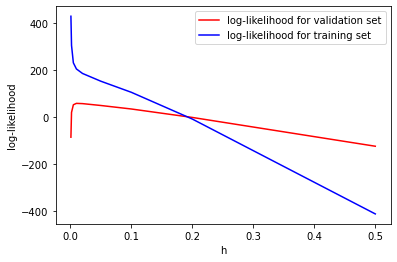

In [73]:
# plot the log-likelihood for the validation set and training set of f(x) as a function of h
plt.plot(hs, Lvh_f, color='r', label='log-likelihood for validation set')
plt.plot(hs, Lh_f, color='b', label='log-likelihood for training set')
plt.xlabel("h")
plt.ylabel("log-likelihood")
plt.legend()
plt.show()

In [74]:
# calculate f_h_star(x) on a list of x
max_h_f = hs[Lvh_f.index(max(Lvh_f))]
f_true_y = []
for i in x:
    if i <= 1 and i >= 0:
        f_true_y.append(2*i)
    else:
        f_true_y.append(0)
fh_f_y = fh_max_kernal(x, f_train, max_h_f)

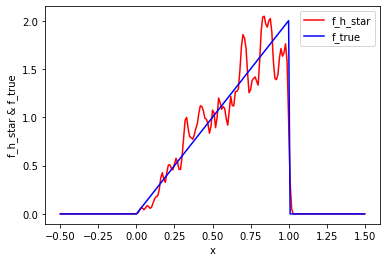

In [75]:
# plot of f_h_star(x) on a list of x
plt.plot(x, fh_f_y, color = 'r', label = "f_h_star")
plt.plot(x, f_true_y, color = 'b', label = "f_true")
plt.xlabel("x")
plt.ylabel("f_h_star & f_true")
plt.legend()
plt.show()

In [76]:
# (b) calculate the log-likelihood for the validation set and training set of g(x)
Lvh_g = []
Lh_g = []
for h in hs:
    Lvh_g.append(gaussianKernal(g_valid, g_train, h))
    Lh_g.append(gaussianKernal(g_train, g_train, h)) 

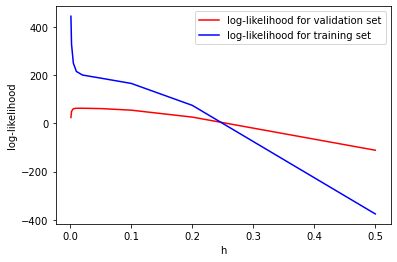

In [77]:
# plot the log-likelihood for the validation set and training set of g(x) as a function of h
plt.plot(hs, Lvh_g, color='r', label='log-likelihood for validation set')
plt.plot(hs, Lh_g, color='b', label='log-likelihood for training set')
plt.xlabel("h")
plt.ylabel("log-likelihood")
plt.legend()
plt.show()

In [78]:
# calculate g_h_star(x) on a list of x
max_h_g = hs[Lvh_g.index(max(Lvh_g))]
g_true_y = []
for i in x:
    if i <= 0.5 and i >= 0:
        g_true_y.append(4*i)
    elif i > 0.5 and i <= 1:
        g_true_y.append(4*(1-i))
    else:
        g_true_y.append(0)
gh_g_y = fh_max_kernal(x, g_train, max_h_g)

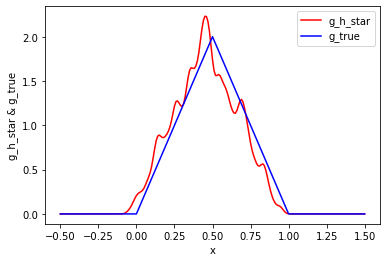

In [79]:
# plot of g_h_star(x) on a list of x
plt.plot(x, gh_g_y, color = 'r', label = "g_h_star")
plt.plot(x, g_true_y, color = 'b', label = "g_true")
plt.xlabel("x")
plt.ylabel("g_h_star & g_true")
plt.legend()
plt.show()

In [80]:
# (c)
print("Log-likelihood for the validation set of g", Lvh_g)
print()
print("Log-likelihood for the validation set of f", Lvh_f)
print()
print("Maximum log-likelihood for the validation set of g", max(Lvh_g))
print()
print("Maximum log-likelihood for the validation set of f", max(Lvh_f))
print("h that maximizes log-likelihood for the validation set of f", max_h_f)
print("h that maximizes log-likelihood for the validation set of g", max_h_g)

Log-likelihood for the validation set of g [23.69768059762529, 48.99254663415782, 60.37990491823313, 61.99359839830663, 62.156063834972045, 60.78298775053163, 54.13377270207425, 25.444638174300806, -111.7231990948633]

Log-likelihood for the validation set of f [-85.55695127459735, 20.149350912110037, 52.751878554009515, 58.76474373743753, 57.69070804205124, 49.71020381273035, 34.79395716280117, -1.2589551432307755, -124.07132873375916]

Maximum log-likelihood for the validation set of g 62.156063834972045

Maximum log-likelihood for the validation set of f 58.76474373743753
h that maximizes log-likelihood for the validation set of f 0.01
h that maximizes log-likelihood for the validation set of g 0.02


In [81]:
# (d)
e_Lvh_f = []
e_Lh_f = []
e_Lvh_g = []
e_Lh_g = []
for h in hs:
    e_Lvh_f.append(EpanechnikovKernel(f_valid, f_train, h))
    e_Lh_f.append(EpanechnikovKernel(f_train, f_train, h))
    e_Lvh_g.append(EpanechnikovKernel(g_valid, g_train, h))
    e_Lh_g.append(EpanechnikovKernel(g_train, g_train, h))

<ipython-input-71-2b178730204c>:31: RuntimeWarning: divide by zero encountered in log
  l_h = l_h + np.log((1/(1000*h))*fhx)


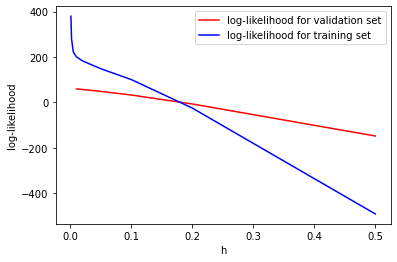

In [83]:
# plot the log-likelihood for the validation set and training set of g(x) as a function of h
plt.plot(hs, e_Lvh_f, color='r', label='log-likelihood for validation set')
plt.plot(hs, e_Lh_f, color='b', label='log-likelihood for training set')
plt.xlabel("h")
plt.ylabel("log-likelihood")
plt.legend()
plt.show()

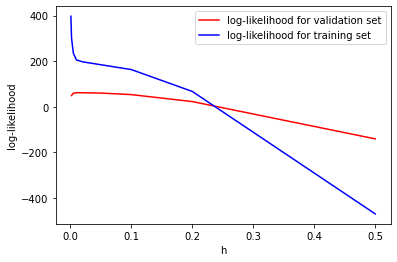

In [84]:
# plot the log-likelihood for the validation set and training set of g(x) as a function of h
plt.plot(hs, e_Lvh_g, color='r', label='log-likelihood for validation set')
plt.plot(hs, e_Lh_g, color='b', label='log-likelihood for training set')
plt.xlabel("h")
plt.ylabel("log-likelihood")
plt.legend()
plt.show()

In [85]:
# calculate f_h_star(x) on a list of x
x = np.linspace(-0.5, 1.5, 201)
e_max_h_f = hs[e_Lvh_f.index(max(e_Lvh_f))]
e_fh_f_y = fh_max_EpaKernal(x, f_train, e_max_h_f)
e_max_h_g = hs[e_Lvh_g.index(max(e_Lvh_g))]
e_gh_g_y = fh_max_EpaKernal(x, g_train, e_max_h_g)

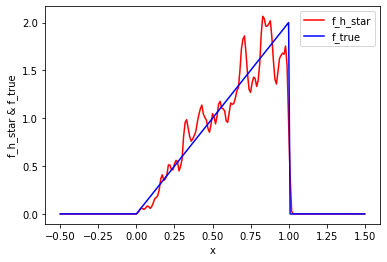

In [86]:
# plot of f_h_star(x) on a list of x
plt.plot(x, e_fh_f_y, color = 'r', label = "f_h_star")
plt.plot(x, f_true_y, color = 'b', label = "f_true")
plt.xlabel("x")
plt.ylabel("f_h_star & f_true")
plt.legend()
plt.show()

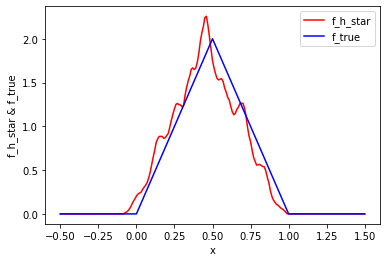

In [87]:
# plot of g_h_star(x) on a list of x
plt.plot(x, e_gh_g_y, color = 'r', label = "f_h_star")
plt.plot(x, g_true_y, color = 'b', label = "f_true")
plt.xlabel("x")
plt.ylabel("f_h_star & f_true")
plt.legend()
plt.show()

In [88]:
print("Log-likelihood for the validation set of g", e_Lvh_g)
print()
print("Log-likelihood for the validation set of f", e_Lvh_f)
print()
print("Maximum log-likelihood for the validation set of g", max(e_Lvh_g))
print()
print("Maximum log-likelihood for the validation set of f", max(e_Lvh_f))
print("h that maximizes log-likelihood for the validation set of f", e_max_h_f)
print("h that maximizes log-likelihood for the validation set of g", e_max_h_g)

Log-likelihood for the validation set of g [-inf, 49.71306080380187, 60.2020087935016, 61.92168032327592, 61.97573055624909, 60.558547283645666, 53.798817230521664, 23.25978709601232, -140.29398690096062]

Log-likelihood for the validation set of f [-inf, -inf, -inf, 59.679368464959474, 57.27511220035661, 48.825021178713044, 32.93454533334218, -6.535462690799886, -147.3181221314621]

Maximum log-likelihood for the validation set of g 61.97573055624909

Maximum log-likelihood for the validation set of f 59.679368464959474
h that maximizes log-likelihood for the validation set of f 0.01
h that maximizes log-likelihood for the validation set of g 0.02
